In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df = df.drop(['Unnamed: 0','key','pickup_datetime'], axis=1)

In [5]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

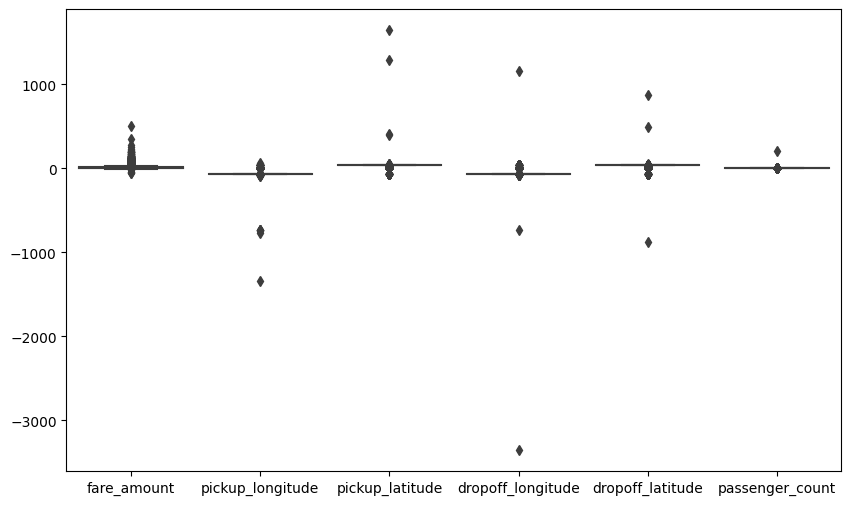

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)  # Set figure size directly during boxplot creation
plt.show()

In [9]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                # Interquartile Range
    
    # Define acceptable range for non-outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows that have outliers in the column
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [12]:
scaled_data

array([[-0.2932847 , -1.1178711 , -0.67988539, -1.10660975, -1.33944605,
        -0.47502273],
       [-0.24166807, -0.77733472, -1.15915782, -0.81952246, -0.1218992 ,
        -0.47502273],
       [ 1.10036418, -1.44370658, -0.565552  ,  1.10237707,  0.88068643,
        -0.47502273],
       ...,
       [-0.2932847 , -0.17673965, -0.75165417, -1.53471183, -0.60271092,
        -0.47502273],
       [ 1.51329718, -0.94995784, -1.29035095, -0.13227415, -2.58814233,
        -0.47502273],
       [ 1.41006393, -0.15635196, -1.54470586, -0.2693492 ,  0.70758523,
        -0.47502273]])

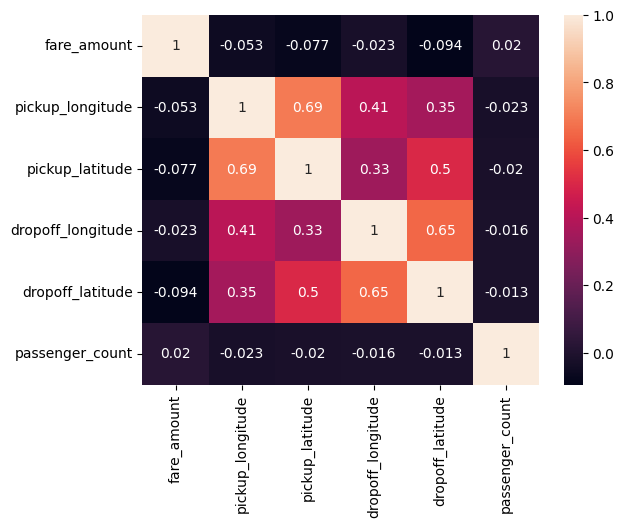

In [13]:
corr = df.corr()
sns.heatmap(corr,annot = True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']]
Y = df['fare_amount']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [15]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [16]:
y_pred

array([8.42078926, 8.86668678, 8.63014518, ..., 8.5575657 , 8.28869843,
       8.82273174])

In [17]:
r2score = r2_score(y_test,y_pred)
print("R2 Score: ", r2score)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ",rmse)

R2 Score:  0.011676686109568846
RMSE:  3.8378146763003067


In [18]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(x_train,y_train)

RandomForestRegressor()

In [19]:
y_pred = model1.predict(x_test)
y_pred


array([4.973, 9.626, 5.969, ..., 8.284, 9.49 , 6.196])

In [20]:
r2score = r2_score(y_test,y_pred)
print("R2 Score: ", r2score)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ",rmse)

R2 Score:  0.7086324836730842
RMSE:  2.0837952570963876
